In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

In [41]:
data = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/refs/heads/main/EmployeeAttrition.csv")

In [42]:
print(data.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [43]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [44]:
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [45]:
data = data.drop(['EmployeeNumber'], axis=1)

In [46]:
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
label_encoders = {}
for col in categorical_cols:
  le = LabelEncoder()
  data[col] = le.fit_transform(data[col])
  label_encoders[col] = le

In [47]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,2,1102,2,1,2,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,1,279,1,8,1,1,1,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,1,1392,1,3,4,1,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,2,591,1,2,1,3,1,1,...,4,80,1,6,3,3,2,2,2,2


In [48]:
X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [49]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X,y)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=45)

In [51]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
log_model = LogisticRegression(random_state=45)
log_model.fit(X_train, y_train)

LogisticRegression(random_state=45)

In [53]:
y_pred_log = log_model.predict(X_test)

In [54]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=45)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=45)

In [55]:
y_pred_rf = rf_model.predict(X_test)

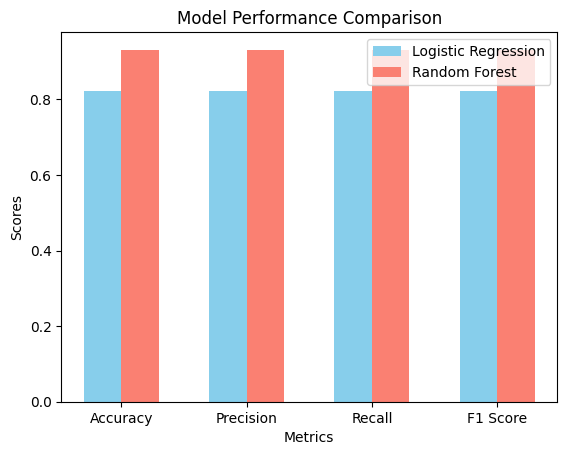

In [56]:
logistic_regression_scores = [
    accuracy_score(y_test, y_pred_log),
    precision_score(y_test, y_pred_log, average='weighted', zero_division=1),
    recall_score(y_test, y_pred_log, average='weighted', zero_division=1),
    f1_score(y_test, y_pred_log, average='weighted', zero_division=1)
]

random_forest_scores = [
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf, average='weighted', zero_division=1),
    recall_score(y_test, y_pred_rf, average='weighted', zero_division=1),
    f1_score(y_test, y_pred_rf, average='weighted', zero_division=1)
]

import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
x = range(len(metrics))
width = 0.3

plt.bar(x, logistic_regression_scores, width=width, label='Logistic Regression', color='skyblue')
plt.bar([i + width for i in x], random_forest_scores, width=width, label='Random Forest', color='salmon')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks([i + width / 2 for i in x], metrics)
plt.legend()

plt.show()

In [57]:
models = {'Logistic Regression': y_pred_log, 'Random Forest': y_pred_rf}
for model_name, y_pred in models.items():
  print(f"---{model_name} Evaluation---")
  print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
  print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
  print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
  print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
  print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
  print("Classification Report:\n", classification_report(y_test, y_pred))
  print("\n")

---Logistic Regression Evaluation---
Accuracy: 0.82
Precision: 0.82
Recall: 0.82
F1 Score: 0.82
Confusion Matrix:
 [[209  50]
 [ 38 197]]
Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.81      0.83       259
         Yes       0.80      0.84      0.82       235

    accuracy                           0.82       494
   macro avg       0.82      0.82      0.82       494
weighted avg       0.82      0.82      0.82       494



---Random Forest Evaluation---
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93
Confusion Matrix:
 [[239  20]
 [ 14 221]]
Classification Report:
               precision    recall  f1-score   support

          No       0.94      0.92      0.93       259
         Yes       0.92      0.94      0.93       235

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494





In [58]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importances.head(10))


                    Feature  Importance
25         StockOptionLevel    0.075167
14          JobSatisfaction    0.062215
11           JobInvolvement    0.055073
16            MonthlyIncome    0.052955
12                 JobLevel    0.049949
8   EnvironmentSatisfaction    0.045669
2                 DailyRate    0.044785
17              MonthlyRate    0.044301
0                       Age    0.039782
30       YearsInCurrentRole    0.038979


Second Project

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

In [60]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bike%20Prices.csv')

In [61]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


In [63]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [64]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

In [65]:
df.shape

(1061, 8)

In [66]:
print("Missing values in features:")
print(df.isnull().sum())

Missing values in features:
Brand                  0
Model                  0
Selling_Price          0
Year                   0
Seller_Type            0
Owner                  0
KM_Driven              0
Ex_Showroom_Price    435
dtype: int64


In [67]:
df.dropna(subset=['Ex_Showroom_Price'], inplace=True)

In [68]:
print("Missing values in features:")
print(df.isnull().sum())

Missing values in features:
Brand                0
Model                0
Selling_Price        0
Year                 0
Seller_Type          0
Owner                0
KM_Driven            0
Ex_Showroom_Price    0
dtype: int64


In [69]:
df.shape

(626, 8)

In [70]:
y = df['Selling_Price']
X = df[['Brand', 'Model', 'Year', 'Owner', 'KM_Driven', 'Ex_Showroom_Price']]

In [71]:
X = pd.get_dummies(X, drop_first=True)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=115)

In [73]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [74]:
y_pred = model.predict(X_test)

In [75]:
mape = mean_absolute_percentage_error(y_test, y_pred)

In [76]:
mape_percentage = mape*100

In [77]:
print(f'Mean Absolute Percentage Error (MAPE): {mape_percentage:.2f}%')

Mean Absolute Percentage Error (MAPE): 20.51%


In [78]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (500, 205)
X_test shape: (126, 205)
y_train shape: (500,)
y_test shape: (126,)
